In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [4]:
house = pd.read_csv('houses_to_rent.csv')
house

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [5]:
house.describe()


,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


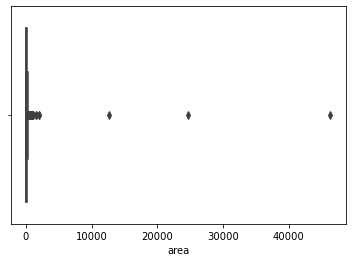

In [6]:
sns.boxplot(house['area'])

In [7]:
house['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

In [8]:
house.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [18]:
High_1000 = house.query('area >1000')
High_1000.head(9)



,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
654,São Paulo,1600,6,6,6,-,acept,furnished,0,7600,1834,115,9549
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646,114,10220
2423,Belo Horizonte,1020,5,4,6,-,acept,furnished,0,6520,654,107,7281
3559,São Paulo,1100,4,6,10,-,acept,not furnished,3000,14000,2000,211,19210
4813,São Paulo,1600,4,5,12,-,acept,not furnished,1,6900,5000,104,12010
5129,Belo Horizonte,2000,4,2,3,-,acept,not furnished,0,4956,200,82,5238
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859,103,18320
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200,67,8267
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96,21,2417


In [19]:
house = house.query('area <= 1000')
house.head(9)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440


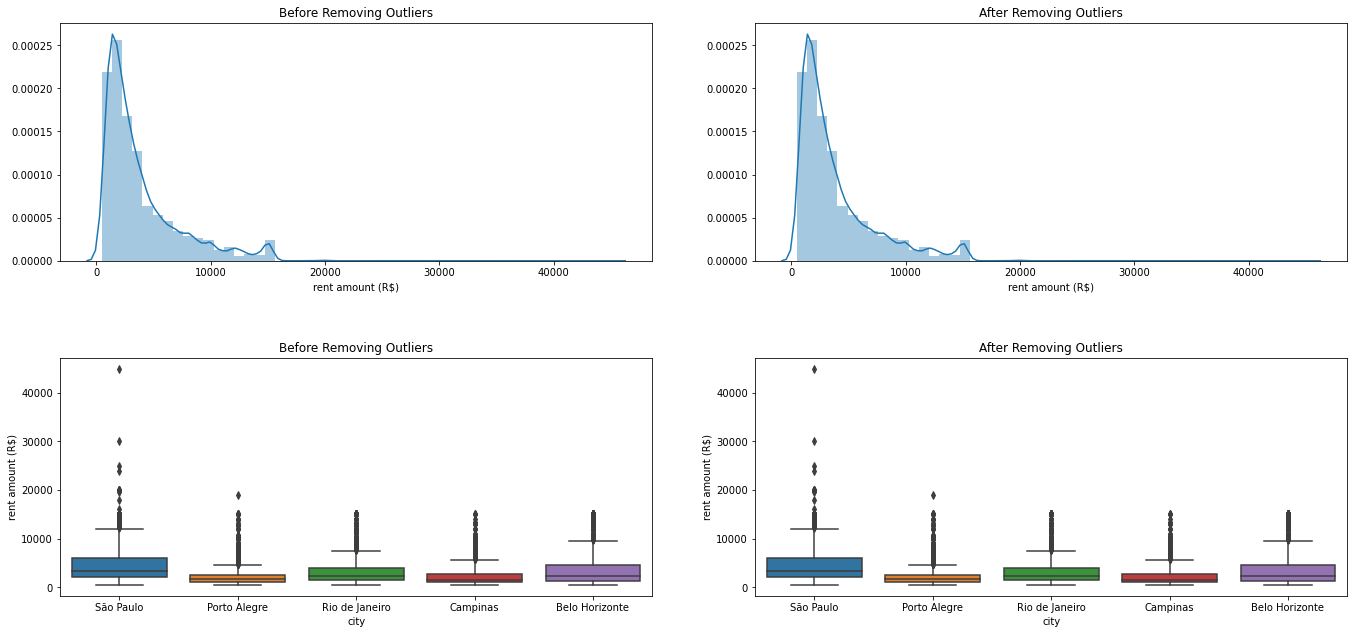

In [14]:
plt.figure(1, figsize=(20, 10))
plt.subplot(2, 2, 1)
sns.distplot(house['rent amount (R$)'])
plt.title('Before Removing Outliers')
plt.subplot(2, 2, 2)
sns.distplot(house['rent amount (R$)'])
plt.title('After Removing Outliers')
plt.subplot(2, 2, 3)
plt.figure(1, figsize=(20, 12))
sns.boxplot(house['city'], house['rent amount (R$)']).set_title('Before Removing Outliers')
plt.subplot(2, 2, 4)
sns.boxplot(house['city'], house['rent amount (R$)']).set_title('After Removing Outliers')
plt.tight_layout(pad=5.0)
plt.show()

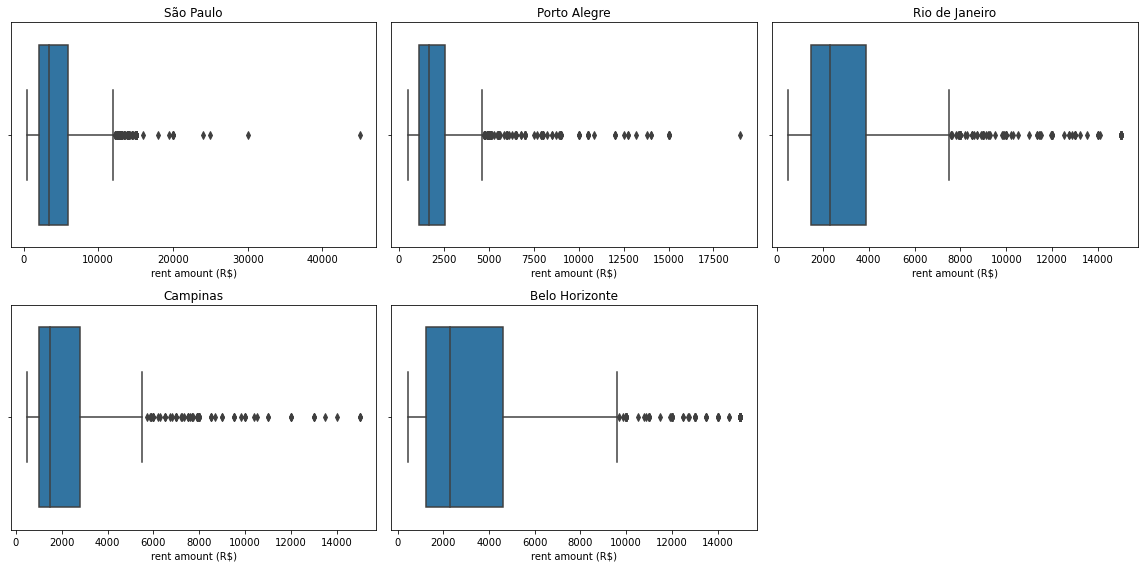

In [16]:
plt.figure(figsize=(16, 8))

i = 1
step = 5000
for city in house['city'].unique():
    if step < 2000:
        step = 2000
    plt.subplot(2, 3, i)
    plt.title(city)
    city_name = house.loc[house['city'] == city]
    sns.boxplot(city_name['rent amount (R$)'])    
    step-=3000
    i+=1

    

plt.tight_layout()
plt.show()

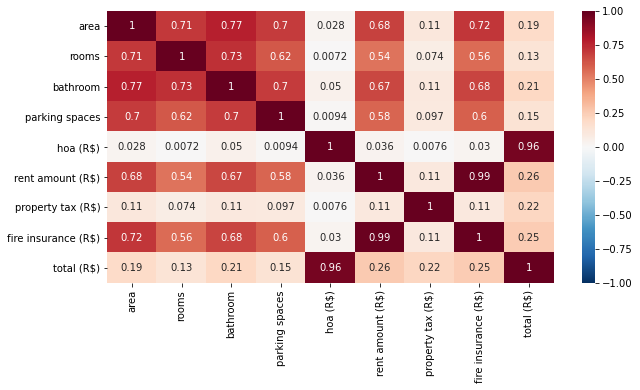

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(house.corr(), annot=True, cmap='RdBu_r', linecolor='black',vmin=-1, vmax=1)

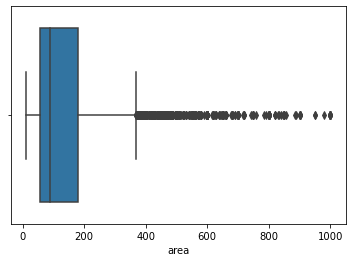

In [16]:
sns.boxplot(house['area'])

In [17]:
house['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

### EDA

### Some cities have higher properties prices

In [21]:
house.groupby('city')['total (R$)'].median().sort_values(ascending = False)

city
São Paulo         4589.0
Rio de Janeiro    3253.0
Belo Horizonte    3025.5
Porto Alegre      2211.0
Campinas          2140.0
Name: total (R$), dtype: float64

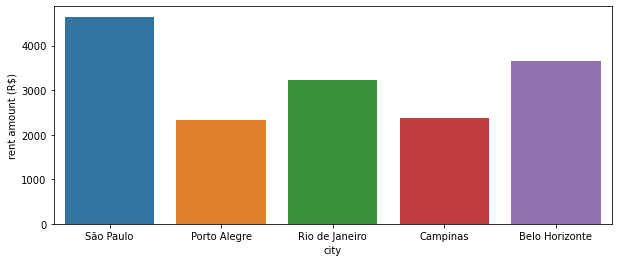

In [37]:
plt.figure(figsize=(10,4))
sns.barplot(x='city', y='rent amount (R$)', ci =False, data =house)

### Having animals impact on the prices

In [25]:
city = house.groupby('animal')['total (R$)'].median().sort_values(ascending = False)
display(city.agg(['mean','median']))

mean      3458.25
median    3458.25
Name: total (R$), dtype: float64

### Houses with a higher condominium fee have a higher rent value

In [36]:
house.groupby('city')['rent amount (R$)'].mean().sort_values(ascending = False)

city
São Paulo         4649.736019
Belo Horizonte    3655.898724
Rio de Janeiro    3232.904064
Campinas          2365.187793
Porto Alegre      2337.699916
Name: rent amount (R$), dtype: float64

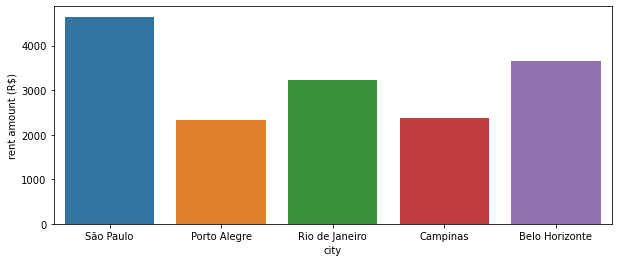

In [35]:
plt.figure(figsize=(10,4))
sns.barplot(x='city', y='rent amount (R$)', ci =False, data =house)

### The number of parking spaces impact on rent value

In [27]:
house.groupby('parking spaces')['rent amount (R$)'].mean().sort_values(ascending = False)

parking spaces
7     9486.363636
6     8890.304348
8     8704.325203
5     8277.148472
4     7752.110406
3     6432.486039
2     4525.009183
10    3900.000000
1     2602.666116
0     2141.055928
Name: rent amount (R$), dtype: float64

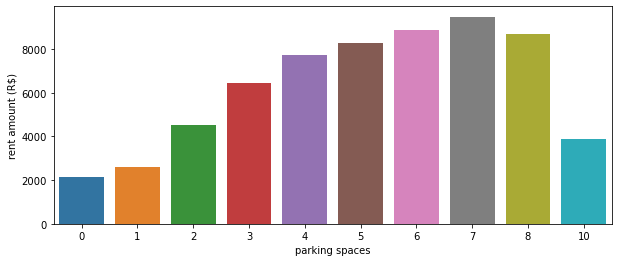

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'parking spaces', y = 'rent amount (R$)', data = house, ci = True)

In [20]:
cols = ['city', 'rooms', 'bathroom', 'parking spaces', 'fire insurance (R$)',
        'furniture']
x = house[cols]
y = house['rent amount (R$)']

In [21]:
dummy = pd.get_dummies(x, columns=['city'])
dummy.drop(columns = ['city_Belo Horizonte'], inplace=True)
x = dummy

#For the citys we use OneHotEncoder and drop the first column to avoid the dummy variable trap